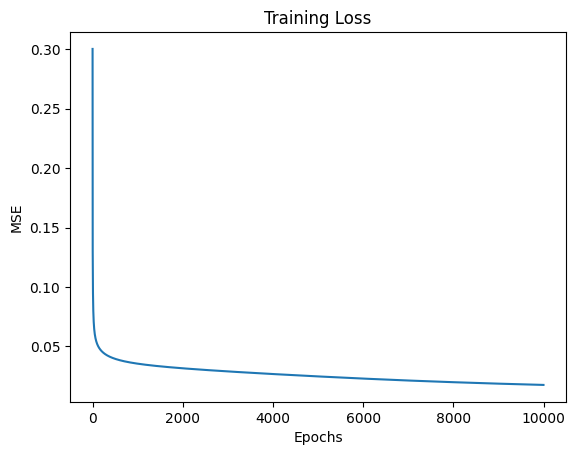

Training accuracy: 98.80%


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")   # <--- Your file name

X = df[["X", "Y"]].values
Y = pd.get_dummies(df["Label"]).values   # One-hot encode 3 classes

X = (X - X.mean(axis=0)) / X.std(axis=0)

class NeuralNetwork:
    def __init__(self):
        input_neurons = 2
        hidden_neurons = 10
        output_neurons = 3  # 3 classes

        self.learning_rate = 0.01
        self.W_HI = np.random.randn(input_neurons, hidden_neurons)
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.W_OH)
        self.pred = self.sigmoid(self.output_input)
        return self.pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = np.dot(output_delta, self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_OH += np.dot(self.hidden_output.T, output_delta)
        self.W_HI += np.dot(X.T, hidden_delta)

    def train(self, X, Y, epochs=5000):
        err = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            err.append(loss)
        return err

NN = NeuralNetwork()
loss = NN.train(X, Y, epochs=10000)

plt.plot(loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

preds = NN.feedForward(X)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(Y, axis=1)

accuracy = np.mean(predicted_classes == true_classes)
print(f"Training accuracy: {accuracy * 100:.2f}%")